In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import ks_2samp
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.lines as mlines

### 1. Test d'adéquation - loi normale
Nous avons utilisé six variables pour le clustering de nos données : 

- L'évolution de la population entre 2010 et 2019.
- La disponibilité alimentaire (calorie et protéines).
- Le ratio protéines animales/protéines total.
- Le PIB par habitant en dollars.
- L'importation de viande de volailles.


Nous allons à présent vérifier l'adéquation de certaines de ces variables à la loi normale. 

Tout d'abord nous allons visulasiser la distribution des individus sur ces variables.

In [2]:
main_df = pd.read_csv(r"C:\Users\elodi\Documents\DATA\Data Analyst\Projets\Projet 5\main_df_subset")
main_df.head()

,Pays,%Evolution_pop_2010/2019,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité protéines(g/personne/jour),%Protéines_animales,PIB/habitants_US$,Importations_1000_tonnes,Cluster
0,Albanie,-2.27,3334.0,115.98,54.0,13671.5,22.0,2
1,Argentine,9.50,3303.0,106.97,63.0,22063.9,5.0,2
2,Australie,13.76,3418.0,107.89,68.0,49455.5,9.0,2
3,Autriche,6.48,3692.0,108.90,59.0,55833.3,113.0,2
4,Canada,9.56,3540.0,108.09,57.0,49006.7,179.0,2


In [3]:
liste_var = ['%Evolution_pop_2010/2019','Disponibilité alimentaire (Kcal/personne/jour)', 
             'Disponibilité protéines(g/personne/jour)', '%Protéines_animales', 'PIB/habitants_US$','Importations_1000_tonnes']

In [4]:
def var_hist(var, i):
    subset = main_df[var]
    n_dataset = len(main_df)
    xbar = np.mean(main_df[var]) # Moyenne
    sprime = np.std(main_df[var], ddof=1) # Ecart-type
    sprime2 = np.var(main_df[var], ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(main_df[var].min(),main_df[var].max(),1)
    y = st.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

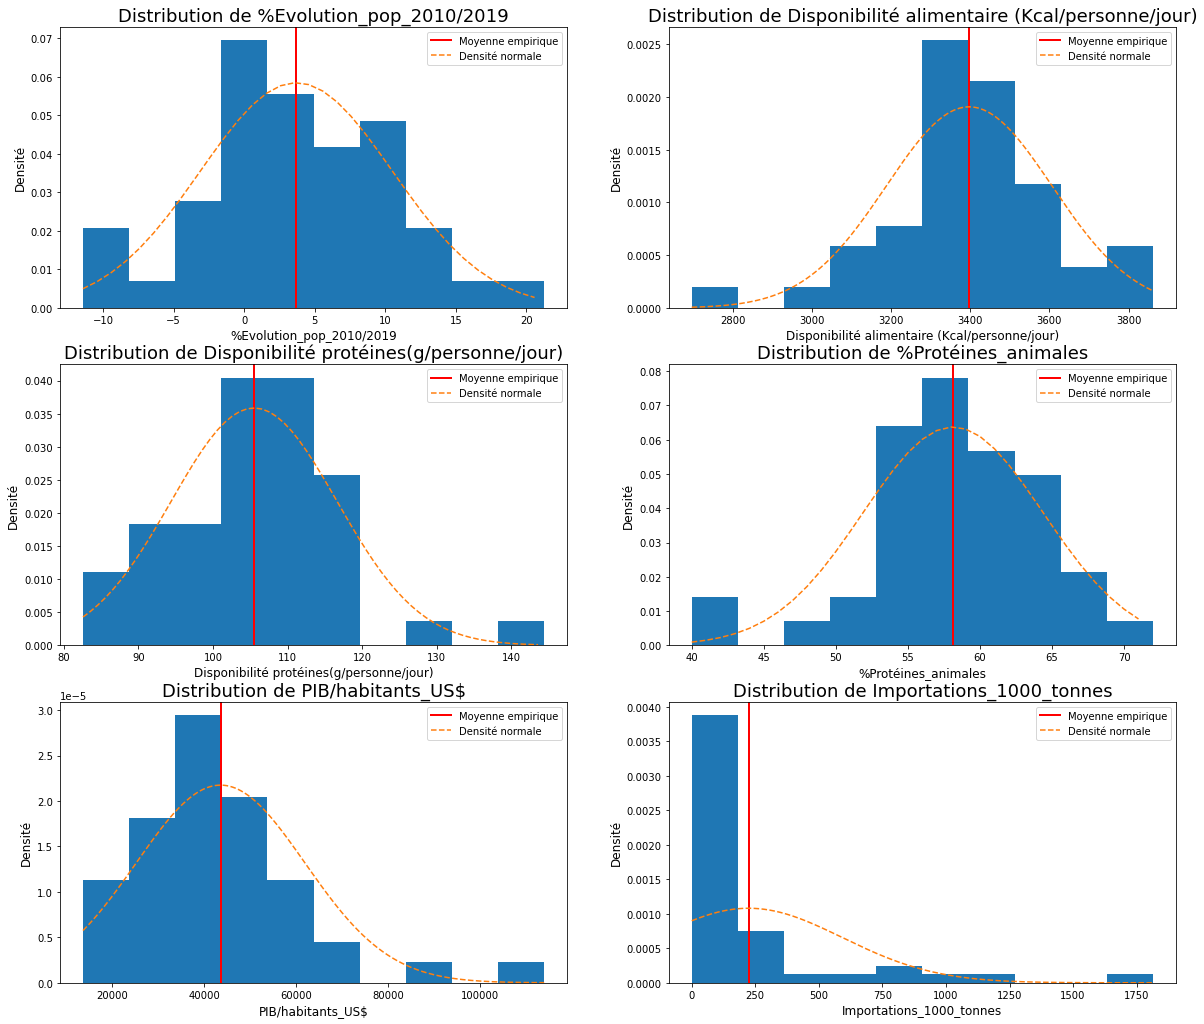

In [5]:
fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 521
for var in liste_var :
    var_hist(var, i)
    i+=1

#### Test d'adéquation de Kolmogorov-Smirnov :

In [6]:
# Disponibilité alimenraire 
stat, p = ks_2samp(main_df['Disponibilité alimentaire (Kcal/personne/jour)'],
          list(np.random.normal(np.mean(main_df['Disponibilité alimentaire (Kcal/personne/jour)']), 
          np.std(main_df['Disponibilité alimentaire (Kcal/personne/jour)']), 1000)))
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 5%')
else:
    print('H0 est rejetée à un niveau de test de 5%')

Statistics=0.096, p=0.793
On ne peut pas rejeter H0 pour des niveaux de test de 5%


In [7]:
# Disponibilité en protéines 
stat, p = ks_2samp(main_df['Disponibilité protéines(g/personne/jour)'],
          list(np.random.normal(np.mean(main_df['Disponibilité protéines(g/personne/jour)']), 
          np.std(main_df['Disponibilité protéines(g/personne/jour)']), 1000)))
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 5%')
else:
    print('H0 est rejetée à un niveau de test de 5%')

Statistics=0.130, p=0.434
On ne peut pas rejeter H0 pour des niveaux de test de 5%


# 
Le test de la variable 'Disponibilité alimentaire (Kcal/personne/jour)' et de la 'Disponibilité protéines(g/personne/jour)' répondent positivement à une loi normale.

#### Test d'adéquation de Shapiro-Wilk :

In [8]:
stat, p = shapiro(main_df['Disponibilité alimentaire (Kcal/personne/jour)'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 5%')
else:
    print('H0 est rejetée pour des niveaux de test de 5%')

Statistics=0.955, p=0.085
On ne peut pas rejeter H0 pour des niveaux de test de 5%


# 
La variable 'Disponibilité alimentaire (Kcal/personne/jour)' suit une loi normale.

### 2. Test de comparaison de 2 Clusters dans le cas gaussien

Variable 'Disponibilité alimentaire (Kcal/personne/jour)'

In [9]:
test_cluster_1 = main_df[main_df['Cluster'] == 1]['Disponibilité alimentaire (Kcal/personne/jour)']
test_cluster_2 = main_df[main_df['Cluster'] == 2]['Disponibilité alimentaire (Kcal/personne/jour)']

In [10]:
#Test égalité des variances
stat, p = bartlett(test_cluster_1, test_cluster_2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette pas H0, l’égalité des variances au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=2.354, p=0.125
On ne rejette pas H0, l’égalité des variances au niveau de test 5%


In [11]:
# Test égalités des moyennes
stat, p = ttest_ind(test_cluster_1, test_cluster_2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=-1.481, p=0.146096738
On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%
